# Optimization techniques Lab. 1: Local search
## Introduction
**Goal.** The goal of this laboratory is to study the application of local search algorithms on different benchmark functions.

We will see the Powell, the BFGS, and the Nelder Mead methods. Moreover, we will study how their parameters change the behavior of these algorithms. 

**Getting started.** The following code cell contains the core functions that we will use. Hence, remember to run it every time the Colab runtime is reconnected.

It contains the three local search algorithms and a wrapper class called *OptFun* for the benchmark function. 
As regards the *OptFun* class, the constructor takes as input a benchmark function (we will see later what functions are available). The relevant methods  are 4:
1.   *Minima*: return the minimum of the function. The position can be obtained by the parameter *position* and the function value from the *score* parameter.
2.   *Bounds*: returns where the function is defined
3.   *Heatmap*: show a heatmap of the function highlighting the points visited by the local search (use with 2d function)
4.   *plot*: show the trend of the points visited by the local search (use with 1d function)
5.   *trend*: show the best points find during the optmization process. 

Each instance of *OptFun* stores the history of the point at which the function has been evaluated. The history is never cleaned and can be obtained through *OptFun.history*. Hence, if you reuse the class instance remember to clean the history (*OptFun.history = list()*).

---

The benchmark functions available comes from the *benchmark_functions* library (imported as *bf*). 
Example of the functions that can be used are the *Hypersphere*, the *Rastrign* the *DeJong5* and the Keane.
The complete list of functions available can be found at this [link](https://gitlab.com/luca.baronti/python_benchmark_functions) or you can print it with *dir(bf)*.




In [ ]:
!pip3 install benchmark_functions
import benchmark_functions as bf
from scipy.optimize import minimize, rosen
import numpy as np
from matplotlib import pyplot as plt

class OptFun():
    def __init__(self, wf):
        self.f = wf
        self.history = []
        
    def __call__(self, x0):
        self.history.append(x0.copy())
        return self.f(x0)

    def minima(self):
        return self.f.minimum()
        
    def bounds(self):
        return self._convert_bounds(self.f.suggested_bounds())

    def in_bounds(self, p):
        bounds_lower, bounds_upper = self.f.suggested_bounds()
        for i in range(len(p)):
            if p[i]<bounds_lower[i] or p[i]>bounds_upper[i]:
                return False
        return True

    def heatmap(self, fn = None):
        plt.clf()
        resolution = 50
        fig = plt.figure()
        fig.canvas.set_window_title('Benchmark Function: '+self.f._name)
        fig.suptitle(self.f._name)
        bounds_lower, bounds_upper = self.f.suggested_bounds()
        x = np.linspace(bounds_lower[0], bounds_upper[0], resolution)
        if self.f._n_dimensions>1:
            y = np.linspace(bounds_lower[1], bounds_upper[1], resolution)
            X, Y = np.meshgrid(x, y)
            Z = np.asarray([[self.f((X[i][j],Y[i][j])) for j in range(len(X[i]))] for i in range(len(X))])

        plt.contour(x,y,Z,15,linewidths=0.5,colors='k') # hight lines
        plt.contourf(x,y,Z,15,cmap='viridis', vmin=Z.min(), vmax=Z.max()) # heat map
        plt.xlabel('x')
        plt.ylabel('y')
        cbar = plt.colorbar()
        cbar.set_label('z')
        if len(self.history)>0:	# plot points
            xdata = [x[0] for x in self.history]
            ydata = [x[1] for x in self.history]
            plt.plot(xdata, ydata, "or-", markersize=2, linewidth=2)
        if fn is None:
            plt.show()
        else:
            plt.savefig(fn, dpi=400)

    def plot(self, fn =None):
        plt.clf()
        showPoints = [x for x in self.history if self.in_bounds(x)]
        xp = [h for h in showPoints]
        values = [self.f(v) for v in xp]
        min = self.f.minimum().score
        bounds = self.bounds()
        Dtmp = [np.linspace(bounds[i][0], bounds[i][1], num=1000) for i in range(len(bounds))]
        D = []
        for i in range(1000):
            D.append([Dtmp[j][i] for j in range(len(bounds))])
        C = []
        for i in range(1000):
            C.append(self.f([Dtmp[j][i] for j in range(len(bounds))]))
        plt.plot(D, C,  label = "function")
        plt.plot(xp, values,  '.', color="r", label="points")
        
        plt.legend()
        if fn is None:
            plt.show()
        else:
            plt.savefig(fn, dpi=400)
            
    def trend(self, fn = None):
        plt.clf()
        showPoints = [x for x in self.history if self.in_bounds(x)]
        values = [self.f(list(v)) for v in showPoints]
        min = self.f.minimum().score
        plt.plot(values)
        plt.axhline(min, color="r", label="optimum")
        plt.legend()
        if fn is None:
            plt.show()
        else:
            plt.savefig(fn, dpi=400)

    def _convert_bounds(self, bounds):
        new_bounds= []
        for i in range(len(bounds[0])):
            new_bounds.append((bounds[0][i], bounds[1][i]))
        return new_bounds

def powell(f: OptFun, x0, maxiter: int):
    """
    Optimizes a function by using the Powell algorithm.

    - f: function to optimize, an instance of OptFun
    - x0: starting point for the search process
    - maxiter: maximum number of iterations
    """
    bounds = f.bounds()
    results = minimize(fun=f, x0=list(x0), method="powell", bounds=bounds, 
                       options={"ftol":1e-4,
                                "maxfev": None,
                                "maxiter": maxiter,
                                "return_all":True})
    return results

def nelder_mead(f: OptFun, x0, maxiter: int):
    """
    Optimizes a function by using the Nelder-Mead algorithm.

    - f: function to optimize, an instance of OptFun
    - x0: starting point for the search process
    - maxiter: maximum number of iterations
    """
    bounds = f.bounds()
    return minimize(
        f,
        x0,
        method='Nelder-Mead',
        tol=None,
        bounds=bounds,
        options={
            "maxfev": None,
            "maxiter": maxiter,
            'disp': False,
            'return_all': True,
            'initial_simplex': None,
            'xatol': 0.000,
            'fatol': 0.000,
            'adaptive': False
        }
    )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.2 MB/s 


# Ex 1: Grid Search
---
In this first exercise we will use grid search as a search algorithm
## Questions
- How does the step size influence the quality of the best point obtained?
- How does the step size influence the search cost?

<Figure size 432x288 with 0 Axes>

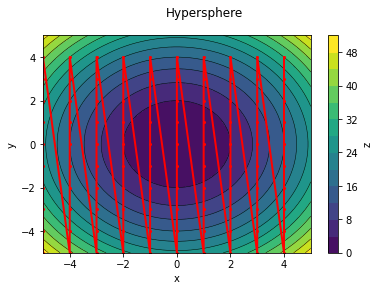

[0.0, 0.0]


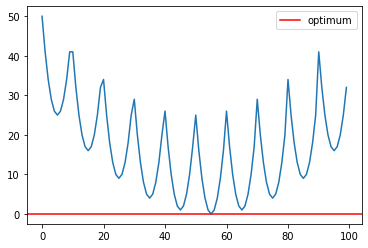

In [ ]:
func = OptFun(bf.Hypersphere(2))
bounds = func.bounds()
step_size = 1
best = float('inf')
for x in np.arange(bounds[0][0], bounds[0][1], step_size):
    for y in np.arange(bounds[1][0], bounds[1][1], step_size):
        current = func([x, y])
        if current < best:
            best = current
func.heatmap()
func.plot()

# Ex 2: Random Search
---
In this exercise we will use Random Search to search for the optimum.
## Questions
- How does the number of samples drawn affect the search?
- How does this method compare to Grid Search? What are the advantages and disadvantages?

<Figure size 432x288 with 0 Axes>

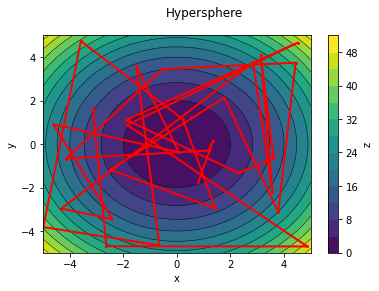

[0.07242700866250829, -0.37061632109863574]


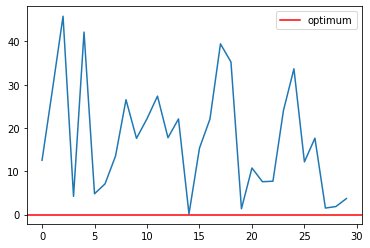

In [ ]:
func = OptFun(bf.Hypersphere(2))
bounds = func.bounds()
n_samples_drawn = 30
best = float('inf')
for i in range(n_samples_drawn):
    x = np.random.uniform(bounds[0][0], bounds[0][1])
    y = np.random.uniform(bounds[1][0], bounds[1][1])
    current = func([x, y])
    if current < best:
        best = current
func.heatmap()
func.plot()

# Ex. 3: Powell Optimization
---
In this exercise we will focus on the Powel optimization algorithm. 

## Questions
*   What happens when varying the parameters of the algorithm?
*   How they influence the optimization process? 
*   The effects of these parameters is the same across different functions?
*   How does this algorithm compare to the previous?

parameters:
*   fun: function to optimize
*   $x_0$: initial point
*   maxiter: maximum number of iteration



['ABC', 'Ackley', 'BenchmarkFunction', 'DeJong3', 'DeJong5', 'Easom', 'EggHolder', 'GoldsteinAndPrice', 'Griewank', 'Himmelblau', 'Hyperellipsoid', 'Hypersphere', 'Keane', 'MartinGaddy', 'McCormick', 'Michalewicz', 'PichenyGoldsteinAndPrice', 'PitsAndHoles', 'Rana', 'Rastrigin', 'Rosenbrock', 'Schaffer2', 'Schwefel', 'StyblinskiTang', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'abstractmethod', 'benchmark_functions', 'fil', 'functions_info_loader', 'logging', 'math', 'multivariate_normal', 'np']


<Figure size 432x288 with 0 Axes>

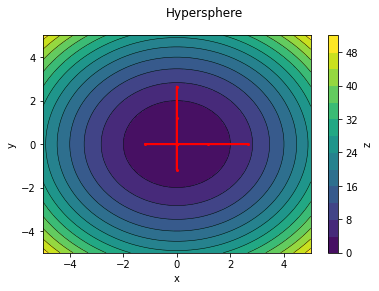

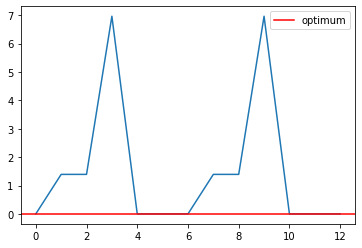

In [ ]:
print(dir(bf))
func = OptFun(bf.Hypersphere(2))
a = powell(func,  (-0.,-0.), 1)
func.heatmap()
func.plot()

# Ex. 4: Nelder Mead Optimization
---
In this exercise we will focus on the Nelder Mead optimization algorithm.
Similar to the previous exercise, answer the following questions:

## Questions
*   What happens when varying the parameters of the algorithm?
*   How they influence the optimization process? 
*   The effects of these parameters is the same across different functions?
*   How does this algorithm compare to the previous?

parameters:

* fun: function to optimize
* 𝑥0 : initial point
* maxiter: maximum number of iteration

<Figure size 432x288 with 0 Axes>

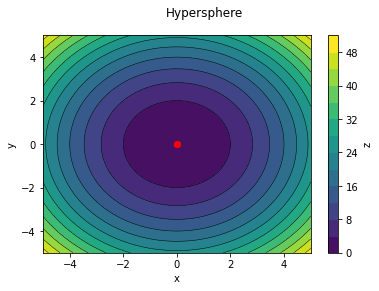

[0. 0.]


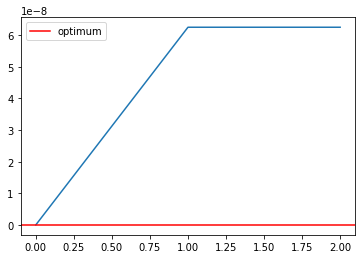

In [ ]:
func = OptFun(bf.Hypersphere(2))
results = nelder_mead(func, [0,0], 1)
func.heatmap()
func.plot()

# Instructions and questions
---
Concisely note down your observations from the previous exercises (follow the bullet points) and
think about the following questions.

* How the benchmark functions influence the optimization algorithms? There is an algorithm which is always better than the other?
* The choiche of the parameters is influenced by the function to optimize? And how the algorithm are influenced by the parameters? 
